<a href="https://colab.research.google.com/github/Gautam-Rajeev/statistical_rethinking/blob/main/notebooks/Lecture_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Lecture 02 - The Garden of Forking Data](https://youtu.be/R1vcdhPBlXA?si=rL3BOz9hHxkPt79m)

# Task: What proportion of earth's surface is covered with water?

## Workflow (Drawing the Owl)

1. Define generative model of tossing the globe
2. Define an estimand -- in this case, the proportion of globe covered in water?
3. Design a statistical means to produce estimate
4. Test (3) using (2)
5. Analyze real data

In [11]:
from scipy import stats as stats
import numpy as np
from matplotlib import pyplot as plt

### 1, 2. Define generative model of globe tossing
- $p$: proportion of water -- this is what we'd like to estimate
- $N$: number of tosses  -- we control this via experiment
- $W$: number of Water observations
- $L$: number of Land observations

### Estimand : what we want to measure
How do we get an estimate, and estimates are always disributions are not points

1. Define the generative model of the sample tossing the globe ( how the sample was collected)
2. Define a specific estimand (what we want to finally measure
3. Design a statistical way to produce an estimate (estimator)
4. Test the estimator using 1
5. How to summarise


Think how scientifically the sample has been created and show that and how one vairable affect other


there is p:  proportion of water
N: number of tosses
W: number of water observations
L: number of land observations


Try and define a causal graph model of how a sample is produced



### My definition :

 Things that can happen - You toss a globe and it has some propotion of water. If p is more the number of water ka outcomes will be higher and the number of tosses is more, the number of water outcomes will be higher

N: is also in your control , no matter the proportion of p, it would intervene W and L

N has a causal influence on W and L

If you change the number of tosses, the number of W/L will change
but if you fabricate data and you change the number of records of W/L somehow, it'll not change the number of tosses,basically an intervention on N would also be an intervention on W and L but not on

What a DAG shows are functional relationship


W and L depends on both p and N

W,L = f(p,N)




#### Bayesian data analysis

- For each possible explanation of the sample
- Count all the ways the sample could occur
- **The explanations with the largest number of ways to produce the sample are more plausible**




For example if we see 5 heads, then and the

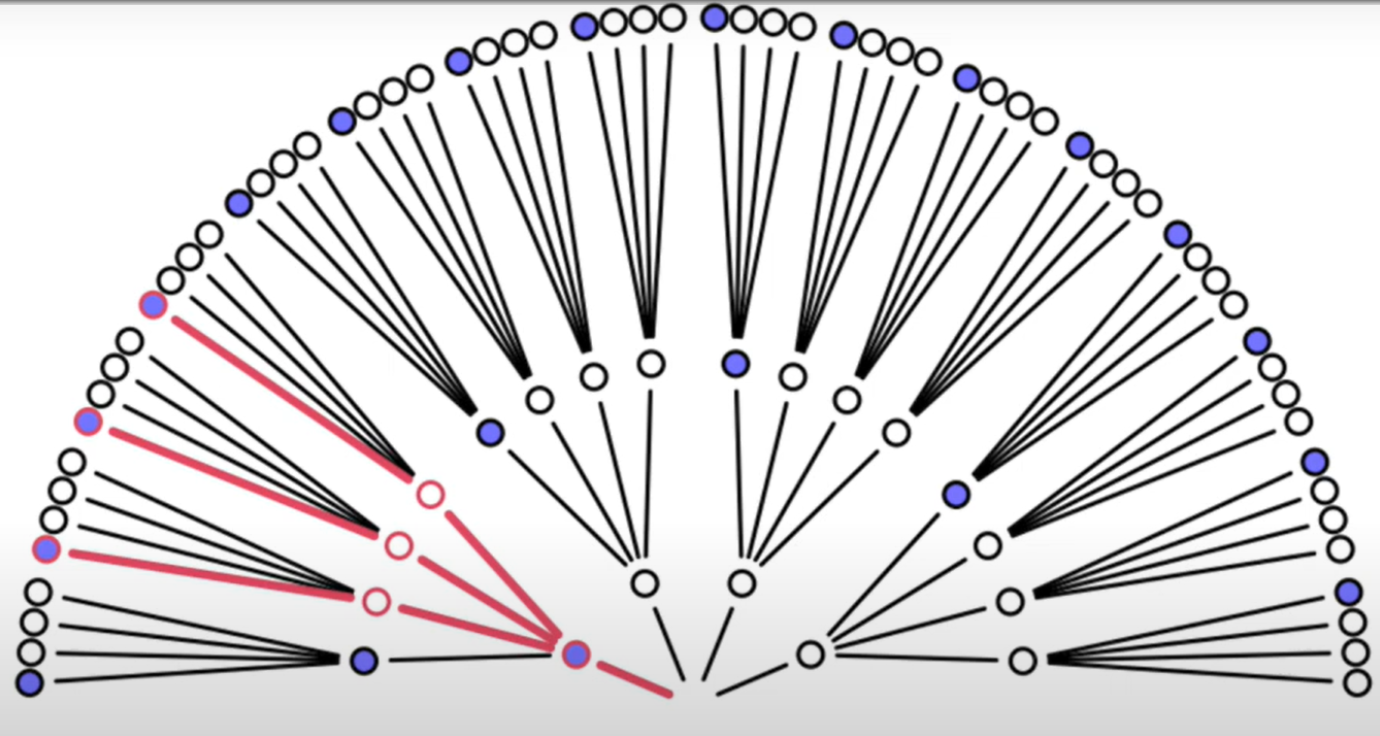

Imagine we see blue, white and blue in our data
The obve are the 64 possible data paths, for a 4 sided die containing one blue and 3 white sides.

But we can see BWB only in 3 of these paths


|||ly for a 4 sided die containing all white:
there are 0 ways to produce this out of 64 possibilities

|||ly for a 4 side dies containing all blue:
there are 0 ways to produce this out of 64 possibilities

||| ly for a 4 side die containing 2 blue and 2 white
there are 2+2 * 2 = 8 ways to produce this

|||ly for a 4 side die containing 3 bluw and 1 white there are :
3 * 3 ways to produce this = 9


We can also think of it in terms of probabbility :

with 0.25 : 1 * 3 * 1/ 4 ** 3

with 0.5 : 2 * 2 * 2/ 4 ** 3

with 0.75: 3 * 1 * 3 / 4 ** 3


In general its n ** b p** w
where n is % of water , p is % of land, b is number of water in outcome w is number of land in outcome


The final distribution we see that shows the percentages of how we can get the outcomes for a given p is called the posterior distribution




In [1]:
## calculating the above through code

#  p : probabilty of the globe covered in water
#  obs :  [1,0,1]
#


p = 0.25

obs = np.array([1,0,1])



In [6]:
"""
p: probability of a water (or die.. when die has one face water and rest 3 land, then p is 0.25)
obs :  observations converted into array of numbers . W is 1. So if observation is [L,W,L], then ob :  [0,1,0]
p_array : Array of p's for which we want to carry out our calculations
new_observation :  a new observation on top of obs seen already , probabilities till then are already calculated

"""

def proba_p(p, obs) :
  """ probability that the p value is p given the observation obs """

  water_obs =  np.sum(obs)
  land_obs = len(obs) -  np.sum(obs)
  return((p ** water_obs) * ((1-p)**land_obs))

def proba_array_p ( p_array,  obs) :
  """ probability that the p value is the elements in p_array given the observation obs """
  posterior_dist_list =  [proba_p(p,obs) for p in p_array]
  return(posterior_dist_list/sum(posterior_dist_list))

def bayesian_updating ( p_array, obs,probabilities,   new_observation) :
  new_probs_array = probabilities *  [proba_p( p, np.array([new_observation])) for p in p_array]
  return(new_probs_array/sum(new_probs_array))


## short notes 1 :

For a given observation WWLWW etc, you can get the possibility of a p value that led to it (in this example, its just a probability based calculation.. what the prob of it being 1,0 for each case given the p values is x.

You can get a discrete distribution of possible p from the example

In [7]:
observations = "WLWWWLWLW"

obs =  [1,0,1,1,1,0,1,0,1]

In [8]:
p_array  = [0, 0.25, 0.5, 0.75, 1]

In [9]:
proba_array_p ( p_array,  obs)

array([0.        , 0.02129338, 0.40378549, 0.57492114, 0.        ])

## 3. Design a statistical way to produce estimate
### Garden of Forking Data
Following the mantra above...

- for each possible **proportion of water**, $p$
- count all the ways the sample of tosses could have occurred
- the $p$ that are associated with more ways to produce the sample are more plausible


## Bayesian (online) Updating

## The whole sample

show that we get identical answers with the analytical solution

#### Results suggest the Analytical Soluiton $W,L = (Rp)^W \times (R - Rp)^L$
where $R$ is the number of possible globes, in this case 4

## Probability
- non-negative values that sum to 1
- normalizes large sums by the total counts

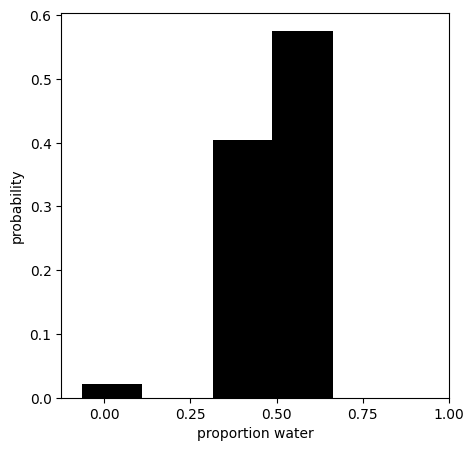

In [12]:
n_possible_probabilities = proba_array_p(p_array, obs)
RESOLUTION = 4
probs = np.linspace(0, 1, RESOLUTION+1)
plt.subplots(figsize=(5, 5))
plt.bar(x=proba_array_p(p_array, obs) , height=n_possible_probabilities, width= .7 / RESOLUTION, color='k')
plt.xticks(probs);
plt.ylabel("probability")
plt.xlabel("proportion water");

## 4. Test (3) using (1)

### Test Before You Est(imate)
1. Code generative simulation
2. Code an estimator
3. Test 2 with 1; you should get expected output

**IF YOU TEST NOTHING YOU MISS EVERYTHING**



### 4.1 Generative Simulation

In [13]:
p = 0.5
n_samples = 4
array_to_sample =  [1,0]

In [ ]:
### writing some code for simiulating globe tosses

In [14]:
def simulate_glob_toss (p,sample_size,array_to_sample):
    return list((np.random.choice(array_to_sample, size = sample_size,  p = np.array([p,1-p]))))

In [ ]:
## randomly predicting the posterior from the glob toss simulation

In [ ]:
### some code for calculating the posterior (distribution of the possibile p values from the observation) from old code and plotting

In [15]:
def plot_posterior(  observation , resolution,  ax=None ):
    p_water = np.linspace(0, 1, resolution+1)
    posterior =  proba_array_p( p_array = p_water , obs = observation  )
    probs = p_water
    if ax is not None:
        plt.sca(ax)
    plt.bar(x=probs, height=posterior, width= .9 / resolution, color='k')
    plt.xticks(probs[::2], rotation=45);
    plt.ylabel("probability")
    plt.xlabel("proportion water")
    plt.title(f"Posterior Calculated\nfrom # Samples: {len(observations)}")

In [23]:
obs =  simulate_glob_toss(0.1,40,array_to_sample= [1,0])

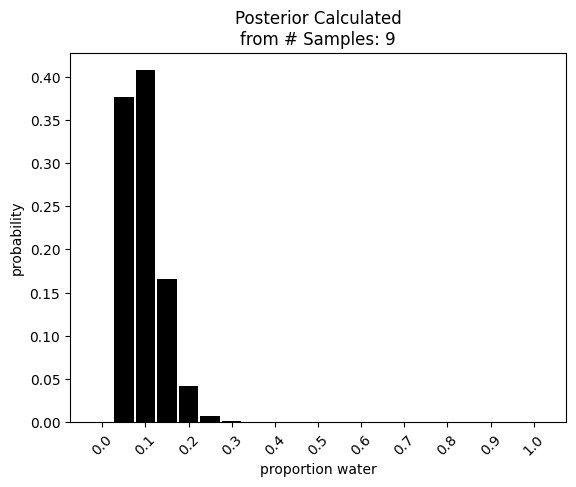

In [24]:
plot_posterior(obs, 20)

#### Test on Extreme settings

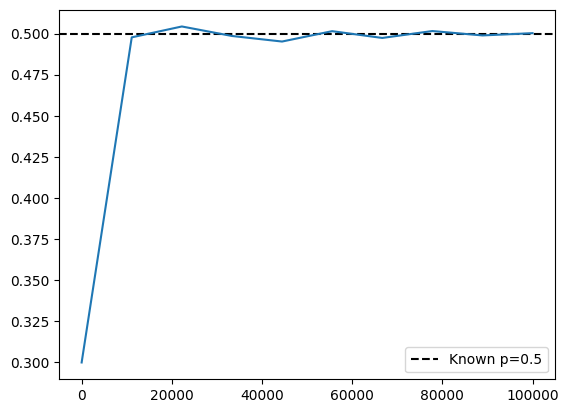

In [26]:
# Large N should converge to known p
known_p = 0.5

simulated_ps = []
sample_sizes = np.linspace(10, 100_000, 10)
for N in sample_sizes:
    simulated_p = np.sum(simulate_glob_toss(p=known_p,sample_size=int(N), array_to_sample = [0,1]))/N
    simulated_ps.append(simulated_p)

plt.axhline(known_p, label=f"Known p={known_p}", color='k', linestyle='--')
plt.legend();
plt.plot(sample_sizes, simulated_ps);

### Testing by generation

### 4.2 Code the estimator

In [27]:
obs = [0,0,1,1,0,1,0,0]

## Infinite Possibilities

### Moving from an N-sided globe to an infinitely-sided globe.
As we increase resolution of globe
- there are more bars/finer-grained resolution along the proportion axis
- bars get shorter with more possibilities -- they must sum to 1

## short notes 1 :

As you increase the number of distinct p, the probability of it being that p decreases and net p gets split across more p's.
As the numbe
r of p's increase, it becomes a continuous distribution and you need a density function to describe it. pde is the value you need to multiply with the interval to get the probability for that interval.  So a pde can be more than 1. like for between 0 to 0.1 pde is 1.2, it jsut means prob between 0 to 0.1 is 0.12.  

Also, Bayesian updating.. as you can add one more example, one more example, the posterior distribution keeps slightly changing and stabilizing


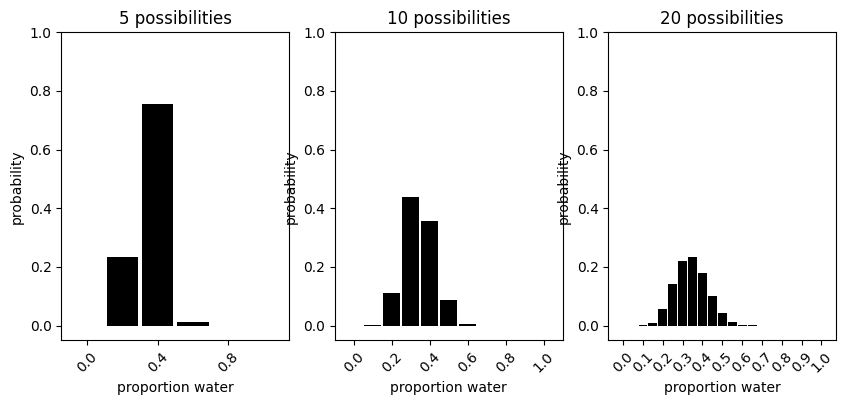

In [28]:
np.random.seed(12)
p = .7
simulated_observations =  simulate_glob_toss (p,sample_size = 30,array_to_sample = [0,1])
_, axs = plt.subplots(1, 3, figsize=(10, 4))
for ii, possibilities in enumerate([5, 10, 20]):
    plot_posterior(simulated_observations, resolution=possibilities, ax=axs[ii])
    plt.ylim([-.05, 1])
    axs[ii].set_title(f"{possibilities} possibilities")

### Beta Distribution

Analytical function that gives us the pdf as the limit as number of possibilities $\rightarrow \infty$

$$
p = \frac{(W + L + 1)!}{W!L!} p^W(1-p)^L
$$

where $\frac{(W + L + 1)!}{W!L!}$ is a normalizing constant to make the distribution sum to 1



## short notes

IN general, now I have some samples ..

I would want to understand how these samples are created, so I figure that out.  
The is my generative model that tells me how the samples have been created from the initial parameters p

For the geenrative model of the sample (not for the sample ) -   I try to figure out my posterior - this is the distribution of p values that creates the data. I can use the posterior distribution and get a distribution of data points that is the posterior predictive

In this case, for coin tosses.. I was ablw to get the posterior ditribtution using the beta function but it may not always be the case. I might have to simulate and get the posterior distribution, and using sampling then create the posterior redicative from this distribution of priors



In [29]:
from scipy.special import factorial

def beta(W, L, p):
    return factorial(W + L + 1) / (factorial(W) * factorial(L)) * p ** W * (1-p) ** L

In [30]:
beta(W = 1,L = 2,p = 0.5)

1.5

### Tossing the Globe

In [ ]:
### the proprotion code cannot be used because for a continuous distributiuon of probabilities, all posteriors are 0, so for a continuous distribution of p, you apporximate the posterior by beta distribution which is an integral over the p values

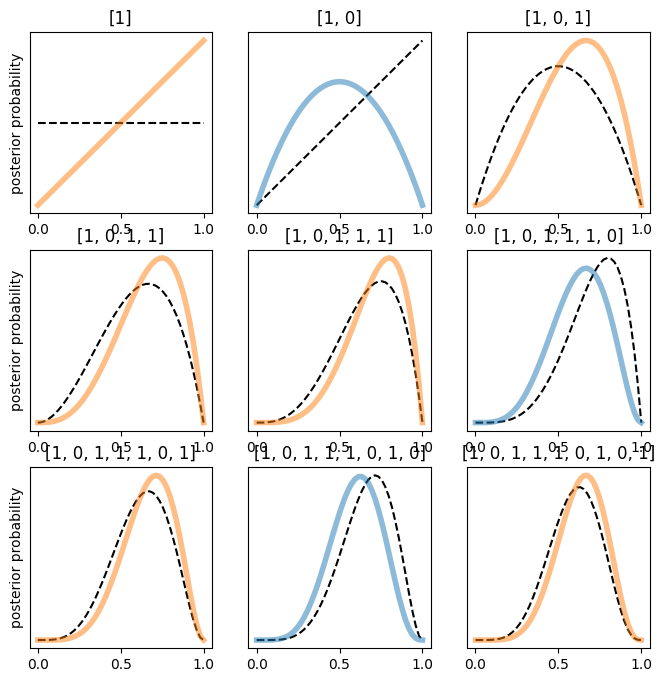

In [32]:
from scipy.special import factorial

def beta(W, L, p):
    return factorial(W + L + 1) / (factorial(W) * factorial(L)) * p ** W * (1-p) ** L


def plot_beta_from_observations(observations,  resolution: int = 50, **plot_kwargs):
    """Calcualte the posterior for a string of observations"""
    n_W = np.sum(observations)
    n_L = len(observations) - n_W
    proportions = np.linspace(0, 1, resolution)

    probs = beta(n_W, n_L, proportions)
    plt.plot(proportions, probs, **plot_kwargs)
    plt.yticks([])
    plt.title(observations)


# Tossing the globe
observations = [1,0,1,1,1,0,1,0,1]
fig, axs = plt.subplots(3, 3, figsize=(8, 8))
for ii in range(9):
    ax = axs[ii // 3][ii % 3]
    plt.sca(ax)
    # Plot previous
    if ii > 0:
        plot_beta_from_observations(observations[:ii], color='k', linestyle='--')
    else:
        # First observation, no previous data
        plot_beta_from_observations([], color='k', linestyle='--')

    color = 'C1' if observations[ii] == 1 else 'C0'
    plot_beta_from_observations(observations[:ii+1], color=color, linewidth=4, alpha=.5)

    if not ii % 3:
        plt.ylabel("posterior probability")


## On Bayesian Inference...
- **There is no minimun sample size** -- fewer samples fall back to prior
- **Posterior shape embodies the sample size** -- more data makes the posterior more precise
- There is no point estimates -- **the estimate is the entire posterior distribution**
- There is no true interval -- there are an infinite number of intervals one could draw, each is arbitrary and depends on what you're trying to communicate/summarize

## From Posterior to Prediction
- To make predictions, we must average (i.e. integrate) over the entire posterior -- this averages over the uncertainty in the posterior
- We could do this with integral calculus
- OR, we could **just take samples from the posterior and average over those**

**TURN A CALCULUS PROBLEM INTO A DATA SUMMARY PROBLEM**

### Sampling from Posterior Distribution

Beta distribution gives the posterior distribution for an observation

In [34]:
a, b = 6, 3
beta_posterior = stats.beta(a, b)
bets_posterior_samples = beta_posterior.rvs(size=1000)

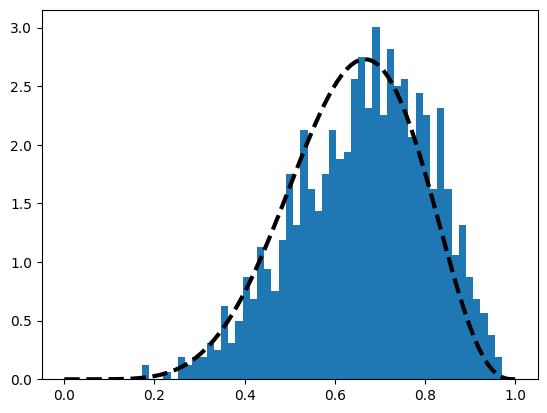

In [35]:
plt.hist(bets_posterior_samples, bins=50, density=True, label='samples');
#plt.plot(probs, beta(a-1, b-1, probs), linewidth=3, color='k', linestyle='--', label='beta distribution')
probs = np.linspace(0, 1, 100)
plt.plot(probs, beta(a, b, probs), linewidth=3, color='k', linestyle='--', label='beta distribution')

## short notes


You can simulate from the posterior. this distribution will be like an estimate or predcition.  

First you have the observations which is the data that you know.

From this you try to figure out what the parameters could be that produced this sample. That is your posterior.

From each p value in the posterior, you create samples that are possible given that p value.

Now, you sample p's from the posterior and for each p values you create samples for that p value

the distribution of these samples is your posterior predictive distribution, this is essentially what you can estimate something with. or the population distribution from which your sample data was

THis is flatter than just the simulation from a point value like say 0.5. (see below) created

### Sampling from Posterior Predictive Distribution
**Posterior Prediction**: a prediction for out-of-sample data based on the current posterior estimate


First you have the observations which is the data that you know.  


From this you try to figure out what the parameters could be that produced this sample.
That is your posterior.

From each p value in the posterior, you create samples that are possible given that p value.

Now, you sample p's from the posterior and for each p values you create samples for that p value

the distribution of these samples is your posterior predictive distribution, this is essentially what you can estimate something with. or the population distribution from which your sample data was created



In [ ]:
## just trying to show how to sample from a posteriior and how its flatter than the restuls of just simulating with p = 0.64 even though posterioir was created froma sample with p = 0.64

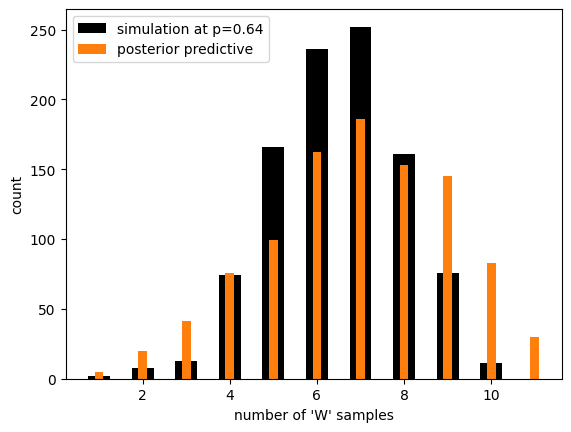

In [36]:
## my sample data : 6 heads and 3 tails

a, b = 7, 4   ### chosen because approximately p is 7/11 is 0.64

##posterior distribution
beta_posterior = stats.beta(a, b)

##sampling from posterior distribution
bets_posterior_samples = beta_posterior.rvs(size=1000)


### simulating across all samples of p
posterior_pred_samples =  [simulate_glob_toss (p,sample_size = a + b ,array_to_sample = [1,0]) for p in bets_posterior_samples]


### now comparing agaisnt a random simulation with p value of 0.64 :
## simulating glob toss for a p value
specific_prob = 0.64
simulation_samples =  [simulate_glob_toss (p = specific_prob,sample_size = 10 ,array_to_sample = [1,0]) for i in range(1,1000)]

ppd_unique, ppd_counts =  np.unique(np.sum(np.array(posterior_pred_samples),axis = 1), return_counts = 1 )
specific_unique, specific_counts = np.unique(np.sum(np.array(simulation_samples),axis = 1), return_counts = 1 )


plt.bar(specific_unique, specific_counts, width=.5, color='k', label=f'simulation at p={specific_prob:1.2}');
plt.bar(ppd_unique, ppd_counts, width=.2, color='C1', label='posterior predictive');
plt.xlabel("number of 'W' samples")
plt.ylabel('count')
plt.legend();


### Sampling is Handsom & Handy
Things we'll compute via sampling
- Forecasts
- Causal effects
- Counterfactuals
- Prior Predictions

# Summary: Bayesian Data Analysis
- For each possible explanation of data
- Count all the ways that data could happen under that explanation
- The explanations with more ways to produce data are more plausable

## Bayesian Modesty
- If your generative model is correct, you can't do better: this will be an optimal
- givens no gaurantees, only provides what you put into it

# Bonus: Misclassification
In previous examples, we  do not consider sampling error or noise in measurement. In other words the number of Water observations that we measure may not be the _true_ number value. This means that the _true_ value for $W$ is unknown / unmeasured, but we instead measure $W^*$ that is a cause of the true, unmeasured $W$ and the measurement process M. If we know our measurement error rate, we can attempt to model it

## Missclassification Simulation

In [37]:
def simulate_noisy_globe_toss(p=0.7, N=9, error_rate=0.1):
    # True sample
    sample = np.random.choice(list("WL"),  size=N, p=np.array([p, 1-p]), replace=True)

    # Error-induced sample
    error_trials = np.random.rand(N) < error_rate
    errors_effect_sample_trials = (sample == 'W') & error_trials
    sample[errors_effect_sample_trials] = 'L'
    return sample

simulate_noisy_globe_toss()

array(['L', 'L', 'W', 'W', 'W', 'W', 'W', 'W', 'W'], dtype='<U1')

## Missclassification Estimator

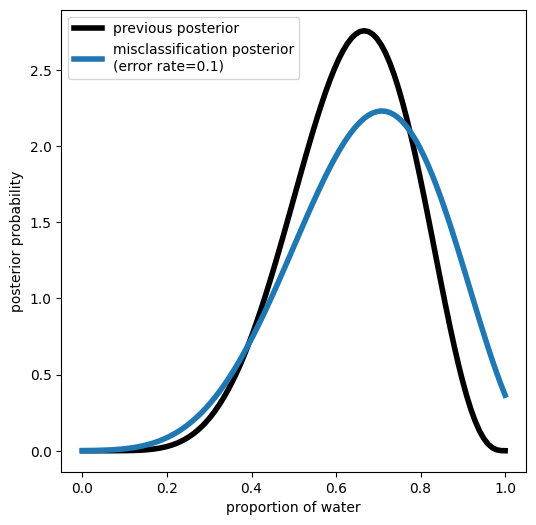

In [38]:
def calculate_unnormalized_n_ways_possible_with_error(p, n_W, n_L, error_rate=0.1):
    n_W_error = (p * (1 - error_rate) + ((1 - p) * error_rate)) ** n_W
    n_L_error = ((1 - p) * (1 - error_rate) + (p * error_rate)) ** n_L
    return n_W_error * n_L_error

a, b = 6, 3
resolution = 100
proportions = np.linspace(0, 1, resolution)
error_rate = 0.1
error_posterior = np.array(
    [
        calculate_unnormalized_n_ways_possible_with_error(p, a, b, error_rate) for p in proportions
    ]
)
beta_posterior = beta(a, b, proportions)

# Infer normalization constant Z from distribution
error_posterior *= resolution / error_posterior.sum()
beta_posterior *= resolution / beta_posterior.sum()

plt.subplots(figsize=(6, 6))
plt.plot(proportions, beta_posterior, label='previous posterior', color='k', linewidth=4)
plt.plot(proportions, error_posterior, label=f'misclassification posterior\n(error rate={error_rate:1.2})', linewidth=4)
plt.xlabel("proportion of water")
plt.ylabel("posterior probability")
plt.legend();

## Measurement Matters
- beter to model measurement error, than to ignore it
- same goes for mssing data
- what matters is _why_ samples differ, and that we are explicit about how model it